In [1]:
import uproot
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import numpy as np
from gemsrs_utils import *

np.random.seed(1)  # We don't use it, but if we do, set it for determinism


In [2]:
# Open file
# events = uproot.open("003200_v9_hists.root")["events"]
events = uproot.open("D:\\data\\gemtrd\\results\\004316_v01_hists.root")["events"]
events.keys() # <== Uncomment to see tree branch names

['srs_raw_count',
 'srs_raw_roc',
 'srs_raw_slot',
 'srs_raw_channel',
 'srs_raw_apv_id',
 'srs_raw_channel_apv',
 'srs_raw_best_sample',
 'srs_raw_samples_index',
 'srs_raw_samples_count',
 'srs_raw_samples',
 'f125_wraw_count',
 'f125_wraw_roc',
 'f125_wraw_slot',
 'f125_wraw_channel',
 'f125_wraw_invalid_samples',
 'f125_wraw_overflow',
 'f125_wraw_itrigger',
 'f125_wraw_samples_index',
 'f125_wraw_samples_count',
 'f125_wraw_samples',
 'f250_wraw_count',
 'f250_wraw_roc',
 'f250_wraw_slot',
 'f250_wraw_channel',
 'f250_wraw_invalid_samples',
 'f250_wraw_overflow',
 'f250_wraw_itrigger',
 'f250_wraw_samples_index',
 'f250_wraw_samples_count',
 'f250_wraw_samples',
 'f125_pulse_count',
 'f125_pulse_roc',
 'f125_pulse_slot',
 'f125_pulse_channel',
 'f125_pulse_npk',
 'f125_pulse_le_time',
 'f125_pulse_time_quality_bit',
 'f125_pulse_overflow_count',
 'f125_pulse_pedestal',
 'f125_pulse_integral',
 'f125_pulse_peak_amp',
 'f125_pulse_peak_time',
 'f125_pulse_word1',
 'f125_pulse_word2'

In [16]:
# Based on events tree, read constants: 
num_time_bins = get_num_time_bins(events)
num_apvs = get_num_apvs(events, num_time_bins)
ch_mapping = get_channel_order(events, num_apvs)
# Channels bar centers that are used in various plots
ch_bar_centers = np.arange(num_channels) - 0.5

print(f"Number of time bins: {num_time_bins}, Number of APVs: {num_apvs}")
print(f"Check mapping: {np.shape(ch_mapping)}")
# print(ch_mapping)   # <== Uncomment to see channels order

Number of time bins: 3, Number of APVs: 12
Check mapping: (128,)


In [17]:
entry_start=3
entry_stop=100
gem_peak_apv_ids =  events['gem_peak_apv_id'].array(library="np", entry_start=entry_start, entry_stop=entry_stop)
gem_peak_plane_names =  events['gem_peak_plane_name'].array(library="np", entry_start=entry_start, entry_stop=entry_stop)

In [32]:
names = np.concatenate(gem_peak_plane_names)
values = np.concatenate(gem_peak_apv_ids)
#names = gem_peak_plane_names.flatten()
values


array([ 0,  1,  4,  4,  6,  0,  1,  1,  4,  6,  6,  6,  7,  7,  7,  7,  0,
        1,  1,  4,  4,  4,  7,  7,  7,  0,  1,  1,  1,  4,  6,  6,  7,  1,
        1,  1,  7,  7,  1,  1,  4,  4,  7,  1,  1,  4,  4,  4,  4,  7,  7,
        1,  1,  1,  7,  7,  7,  7,  1,  1,  7,  1,  1,  4,  7,  7, 10,  1,
        1,  1,  4,  4,  7,  7,  1,  1,  1,  1,  1,  4,  4,  4,  4,  4,  4,
        4,  6,  7,  7,  7, 10, 10, 10,  1,  7,  0,  1,  1,  7,  7,  7,  6,
        0,  6,  1,  7,  1,  7,  1,  7,  1,  7,  0,  6,  6,  1,  7,  0,  1,
        7,  1,  7,  1,  7,  1,  7,  6,  1,  7,  1,  7,  6,  0,  1,  7,  7,
        1,  7,  7,  7,  7,  1,  7,  0,  1,  7,  1,  7,  6,  7,  0,  0,  0,
        6,  7,  1,  7,  0,  6,  7,  1,  7,  7,  0,  1,  1,  7,  0,  0,  6,
        1,  7,  0,  1,  7,  6,  7,  0,  6,  1,  7,  0,  6,  1,  7,  6,  1,
        7,  1,  7,  0,  1,  7,  7,  0,  1,  7,  0,  1,  7,  6,  1,  7,  1,
        7], dtype=uint32)

In [40]:
np.unique(values)

array([ 0,  1,  4,  6,  7, 10], dtype=uint32)

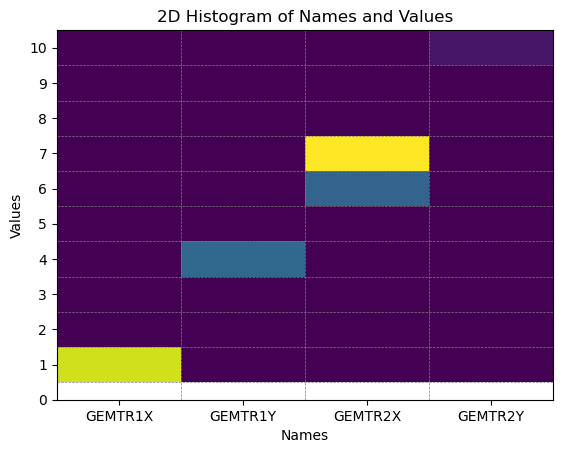

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
# Convert names to numeric categories
categories = np.unique(names, return_inverse=True)[1]
bins_x = np.arange(-0.5, len(np.unique(names)), 1)
bins_y = np.arange(0.5, max(values)+1.5, 1)
# Plotting 2D histogram
plt.hist2d(categories, values, [bins_x, bins_y])


# Drawing vertical lines between histogram bins
for bin_edge in bins_y:
    plt.axhline(bin_edge, color='grey', linestyle='--', linewidth=0.5)

# Drawing vertical lines between histogram bins
for bin_edge in bins_x:
    plt.axvline(bin_edge, color='grey', linestyle='--', linewidth=0.5)
    
# Adjusting x-ticks to show category names
plt.xticks(ticks=np.arange(len(np.unique(names))), labels=np.unique(names))
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.xlabel('Names')
plt.ylabel('Values')
plt.title('2D Histogram of Names and Values')
plt.show()

In [39]:
bins_x

array([-0.5,  0.5,  1.5,  2.5,  3.5])

In [20]:
gem_peak_apv_ids

array([array([0, 1, 4, 4, 6], dtype=uint32),
       array([0, 1, 1, 4, 6, 6, 6, 7, 7, 7, 7], dtype=uint32),
       array([0, 1, 1, 4, 4, 4, 7, 7, 7], dtype=uint32),
       array([0, 1, 1, 1, 4, 6, 6, 7], dtype=uint32),
       array([1, 1, 1, 7, 7], dtype=uint32),
       array([1, 1, 4, 4, 7], dtype=uint32),
       array([1, 1, 4, 4, 4, 4, 7, 7], dtype=uint32),
       array([1, 1, 1, 7, 7, 7, 7], dtype=uint32),
       array([1, 1, 7], dtype=uint32),
       array([ 1,  1,  4,  7,  7, 10], dtype=uint32),
       array([1, 1, 1, 4, 4, 7, 7], dtype=uint32),
       array([ 1,  1,  1,  1,  1,  4,  4,  4,  4,  4,  4,  4,  6,  7,  7,  7, 10,
              10, 10], dtype=uint32)                                             ,
       array([1, 7], dtype=uint32), array([0, 1, 1], dtype=uint32),
       array([], dtype=uint32), array([], dtype=uint32),
       array([7], dtype=uint32), array([], dtype=uint32),
       array([], dtype=uint32), array([], dtype=uint32),
       array([7], dtype=uint32), arra

In [4]:
# Lets check mapping:

# def apv_channel_correction(channel):
#     return (32 * (channel % 4)) + (8 * (channel // 4)) - (31 * (channel // 16))
man_map = [
0, 32, 64, 96, 8, 40, 72, 104, 16, 48, 80, 112,
24, 56, 88, 120, 1, 33, 65, 97, 9, 41, 73, 105,
17, 49, 81, 113, 25, 57, 89, 121, 2, 34, 66, 98,
10, 42, 74, 106, 18, 50, 82, 114, 26, 58, 90, 122,
3, 35, 67, 99, 11, 43, 75, 107, 19, 51, 83, 115, 27,
59, 91, 123, 4, 36, 68, 100, 12, 44, 76, 108, 20, 52,
84, 116, 28, 60, 92, 124, 5, 37, 69, 101, 13, 45, 77,
109, 21, 53, 85, 117, 29, 61, 93, 125, 6, 38, 70, 102,
14, 46, 78, 110, 22, 54, 86, 118, 30, 62, 94, 126, 7,
39, 71, 103, 15, 47, 79, 111, 23, 55, 87, 119, 31, 63,
95, 127, ]


def apv_channel_correction(channel):
    # Ensure the input is within the range of a 32-bit unsigned integer
    channel = channel % 2**32

    # Perform the calculation
    result = (32 * (channel % 4)) + (8 * (channel // 4)) - (31 * (channel // 16))

    # Mimic 32-bit unsigned integer overflow
    result = result % 2**32

    return result

for i_ch in range(num_channels):
    print(f"Channel {i_ch:<4}: file {man_map[i_ch] - apv_channel_correction(i_ch)}")
    
    
ch_mapping=np.array(man_map)
# for i_ch in range(num_channels):

Channel 0   : file 0
Channel 1   : file 0
Channel 2   : file 0
Channel 3   : file 0
Channel 4   : file 0
Channel 5   : file 0
Channel 6   : file 0
Channel 7   : file 0
Channel 8   : file 0
Channel 9   : file 0
Channel 10  : file 0
Channel 11  : file 0
Channel 12  : file 0
Channel 13  : file 0
Channel 14  : file 0
Channel 15  : file 0
Channel 16  : file 0
Channel 17  : file 0
Channel 18  : file 0
Channel 19  : file 0
Channel 20  : file 0
Channel 21  : file 0
Channel 22  : file 0
Channel 23  : file 0
Channel 24  : file 0
Channel 25  : file 0
Channel 26  : file 0
Channel 27  : file 0
Channel 28  : file 0
Channel 29  : file 0
Channel 30  : file 0
Channel 31  : file 0
Channel 32  : file 0
Channel 33  : file 0
Channel 34  : file 0
Channel 35  : file 0
Channel 36  : file 0
Channel 37  : file 0
Channel 38  : file 0
Channel 39  : file 0
Channel 40  : file 0
Channel 41  : file 0
Channel 42  : file 0
Channel 43  : file 0
Channel 44  : file 0
Channel 45  : file 0
Channel 46  : file 0
Channel 47  :

In [5]:
entry_start = 100                     # 1st event to process
entry_stop = entry_start + 1          # Last event to process

unsorted_raw_samples =  events['srs_raw_samples'].array(
    library="np", entry_start=entry_start, entry_stop=entry_stop)


In [6]:
srs_raw_channel =  events['srs_raw_channel'].array(library="np", entry_start=entry_start, entry_stop=entry_start+1)
srs_raw_apv_id =  events['srs_raw_apv_id'].array(library="np", entry_start=entry_start, entry_stop=entry_start+1)
srs_raw_channel_apv =  events['srs_raw_channel_apv'].array(library="np", entry_start=entry_start, entry_stop=entry_start+1)

for i in range(len(srs_raw_channel[0])):
    print(f"ch: {srs_raw_channel[0][i]:<5}, apv_id: {srs_raw_apv_id[0][i]:<5}, ch_apv: {srs_raw_channel_apv[0][i]:<5}, val: {unsorted_raw_samples[0][i]:<5}  ")
# 'srs_raw_count',
# 'srs_raw_roc',
# 'srs_raw_slot',
# 'srs_raw_channel',
# 'srs_raw_apv_id',
# 'srs_raw_channel_apv',
# 'srs_raw_best_sample',
# 'srs_raw_samples_index',
# 'srs_raw_samples_count',
# 'srs_raw_samples',


ch: 0    , apv_id: 0    , ch_apv: 0    , val: 2778   
ch: 1    , apv_id: 0    , ch_apv: 32   , val: 2699   
ch: 2    , apv_id: 0    , ch_apv: 64   , val: 2767   
ch: 3    , apv_id: 0    , ch_apv: 96   , val: 2886   
ch: 4    , apv_id: 0    , ch_apv: 8    , val: 2808   
ch: 5    , apv_id: 0    , ch_apv: 40   , val: 2799   
ch: 6    , apv_id: 0    , ch_apv: 72   , val: 2890   
ch: 7    , apv_id: 0    , ch_apv: 104  , val: 2867   
ch: 8    , apv_id: 0    , ch_apv: 16   , val: 2844   
ch: 9    , apv_id: 0    , ch_apv: 48   , val: 2881   
ch: 10   , apv_id: 0    , ch_apv: 80   , val: 2859   
ch: 11   , apv_id: 0    , ch_apv: 112  , val: 2865   
ch: 12   , apv_id: 0    , ch_apv: 24   , val: 2964   
ch: 13   , apv_id: 0    , ch_apv: 56   , val: 2933   
ch: 14   , apv_id: 0    , ch_apv: 88   , val: 2918   
ch: 15   , apv_id: 0    , ch_apv: 120  , val: 2928   
ch: 16   , apv_id: 0    , ch_apv: 1    , val: 2914   
ch: 17   , apv_id: 0    , ch_apv: 33   , val: 2926   
ch: 18   , apv_id: 0    , ch

## Explanation of data: 
We have data in *srs_raw_samples* that looks like this (**num_time_bins=3**)
```
[
  [2820, 2810, 2717, 2774,  ...],  # event 0
  [2886, 2814, 2757, 2833,  ...],  # event 1
  ...
]
```
The values correspond to apv:channel:time-bin
Imagine we have 3 time bins, then the previous data for a single event (1 row) will correspond to

```
[apv0:ch0:t0, apv0:ch0:t1, apv0:ch0:t2, apv0:ch1:t0 ... apv0:ch128:t2, apv1:ch0:t0, ...]
```

In [7]:
# Convert co (events, apvs, channels, time-bins) shape
reshape_tuple = (len(unsorted_raw_samples), num_apvs, num_channels, num_time_bins)
print(f"Reshaping {np.shape(np.vstack(unsorted_raw_samples))} to {reshape_tuple}")
channel_data = np.vstack(unsorted_raw_samples).reshape(reshape_tuple)
print(channel_data.shape)

# channel_data is of shape (1000, 7, 128, 6), the ch_mapping is (128) w
# We will sort along the third axis using the indices from ch_mapping
# raw_samples = np.take_along_axis(channel_data, ch_mapping[np.newaxis, np.newaxis, :, np.newaxis], axis=2)

# Assuming channel_data and ch_mapping are already defined
# channel_data.shape -> (1000, 7, 128, 6)
# ch_mapping.shape -> (128,)

# Initialize an empty array with the same shape as channel_data
sorted_data = np.empty_like(channel_data)

# Manually reorder the third axis using nested loops
for i in range(channel_data.shape[0]):  # Loop over the first dimension
    for j in range(channel_data.shape[1]):  # Loop over the second dimension
        for k in range(channel_data.shape[3]):  # Loop over the fourth dimension
            for l, index in enumerate(ch_mapping):  # Loop over the third dimension
                sorted_data[i, j, l, k] = channel_data[i, j, index, k]

raw_samples =         sorted_data        
# raw_samples = channel_data

Reshaping (1, 4608) to (1, 12, 128, 3)
(1, 12, 128, 3)


In [8]:
event = unsorted_raw_samples[0]
ct = channel_data[0]

for i_apv in range(num_apvs):
    for i_ch in range(num_channels):
        for i_t in range(num_time_bins):
            gidx = num_channels*num_time_bins*i_apv + i_ch*num_time_bins + i_t
            if ct[i_apv][i_ch][i_t]-event[gidx]:
                print(ct[i_apv][i_ch][i_t]-event[gidx])

In [9]:
# Compute the mean over the 0-th and 3-rd axes
pedestals = np.mean(raw_samples, axis=(0, 3))
# pedestals     # <= uncomment to look exact values

In [10]:
# Subtract pedestals
samples = raw_samples - pedestals[np.newaxis, :, :, np.newaxis]
# samples[0][0]

In [11]:
noises = np.std(samples, axis=(0, 3))
noises.shape

(12, 128)

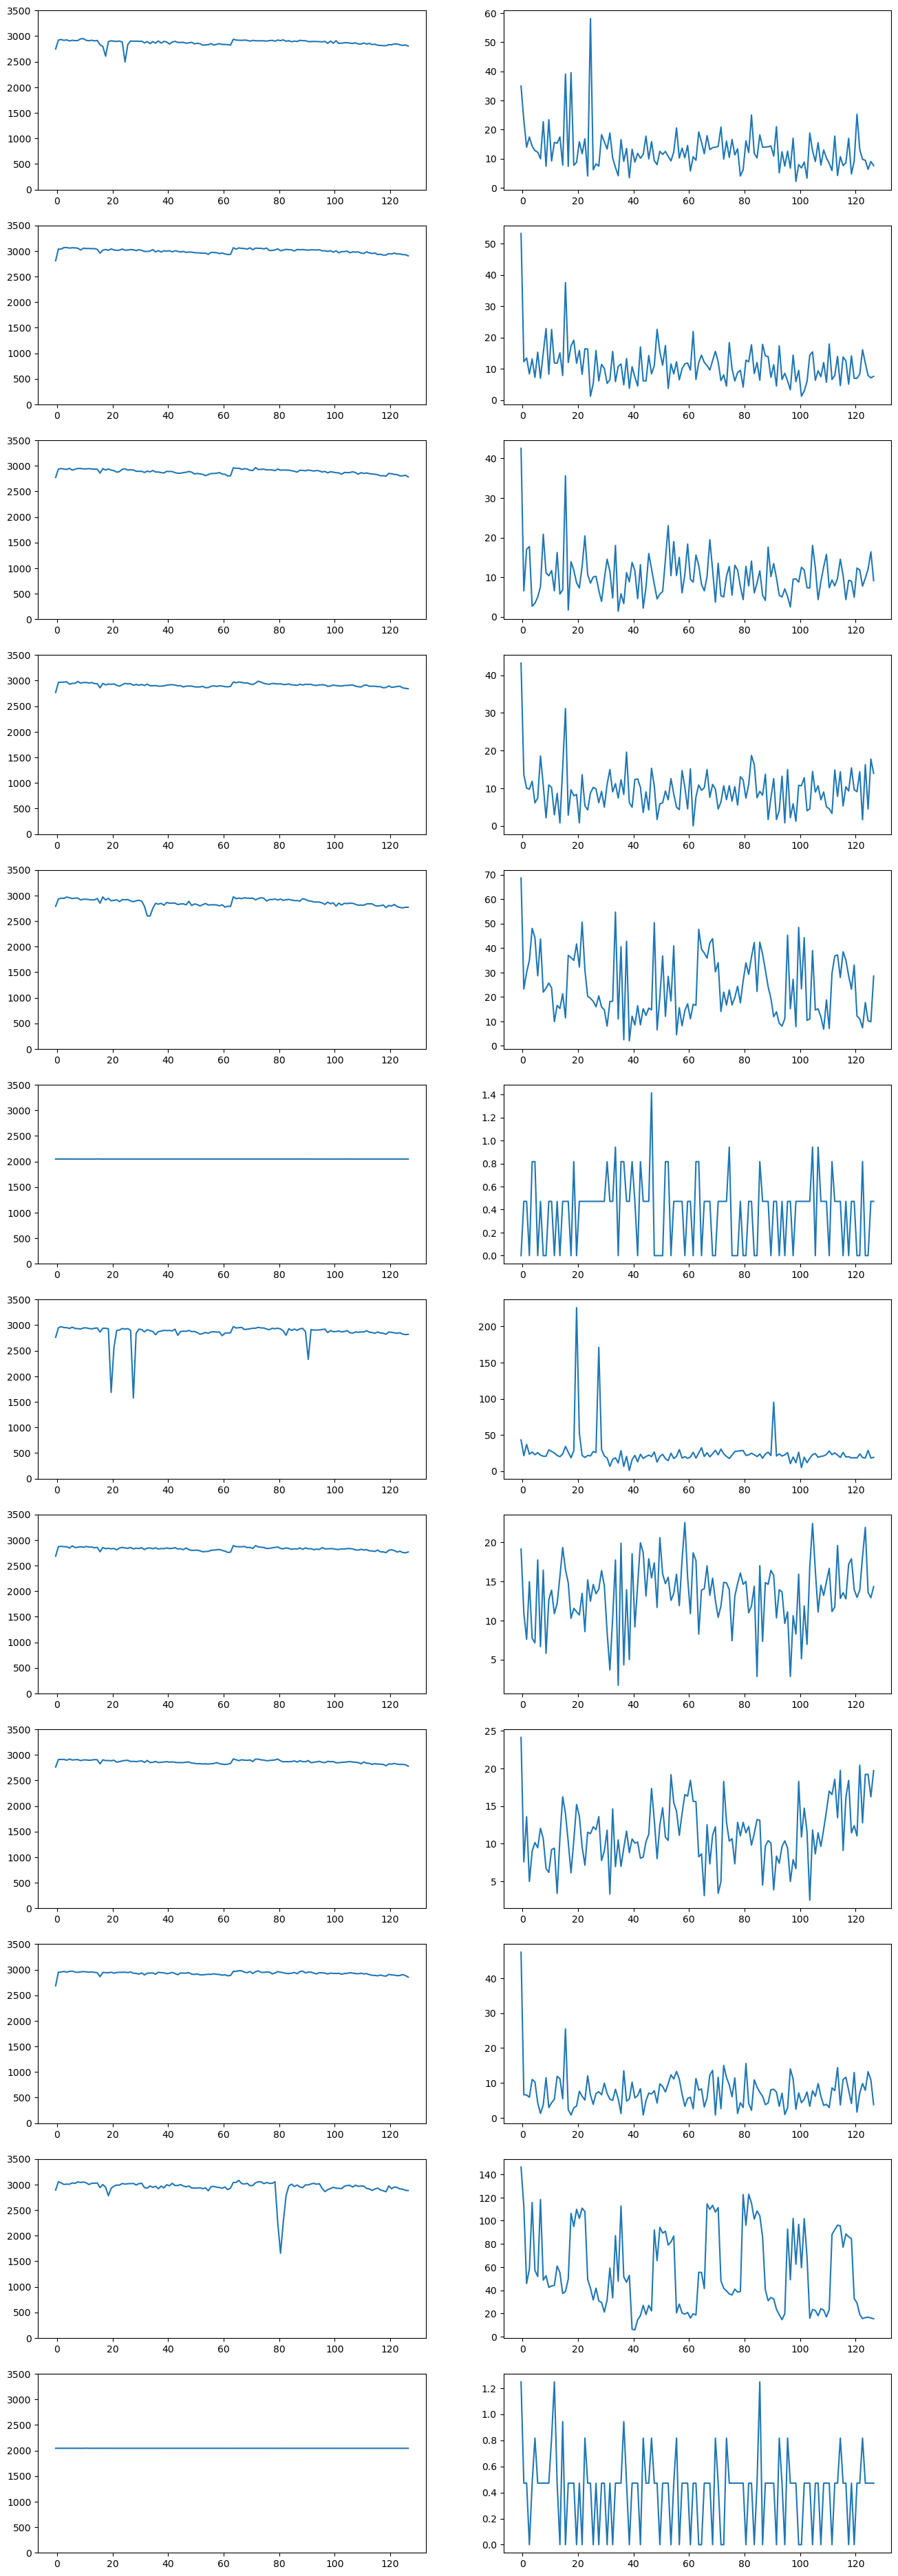

In [12]:
# Generate x values

# Create the figure and axes objects
_, apv_axes = plt.subplots(num_apvs, 2, figsize=(16, 4*num_apvs))  # You can specify your figure size here

for i_apv, axes in enumerate(apv_axes):
    # print(axes, ch_bar_centers.shape, pedestals[i_apv].shape, noises[i_apv].shape)
    axes[0].plot(ch_bar_centers, pedestals[i_apv],) # width=1.0, edgecolor='black')
    axes[1].plot(ch_bar_centers, noises[i_apv],   ) #width=1.0, edgecolor='black')
    #assert isinstance(axes[0], Axes)
    axes[0].set_ylim(0, 3500)
    
#     ax.bar(ch_bar_centers, pedestals[i], width=1)
# 
# # Create the figure and axes objects
# _, ax = plt.subplots(figsize=(16, 6))  # You can specify your figure size here
# 
# # Create the bar plot on the axes object
# ax.bar(x_values, pedestals[0], width=1.0, edgecolor='black')
# 
# # Set axis titles
# ax.set_xlabel('Channels')
# ax.set_ylabel('Pedestals')



In [13]:

# Reshape mean_array for broadcasting
mean_array_reshaped = pedestals[:, :, np.newaxis]

# Subtract mean_array from every element in array across the 0-th and 3-rd axes
array_centered = -1*(channel_data - mean_array_reshaped)

# Verify the operation
array_centered.shape

(1, 12, 128, 3)

In [14]:
#np.transpose(array_centered, (0,1,3,2)).reshape(len(array_centered),num_apvs, num_channels*num_time_bins)
flattened = np.transpose(channel_data, (0,1,3,2)).reshape(len(array_centered),num_apvs, num_channels*num_time_bins)
flattened.shape

(1, 12, 384)

IndexError: index 5 is out of bounds for axis 0 with size 1

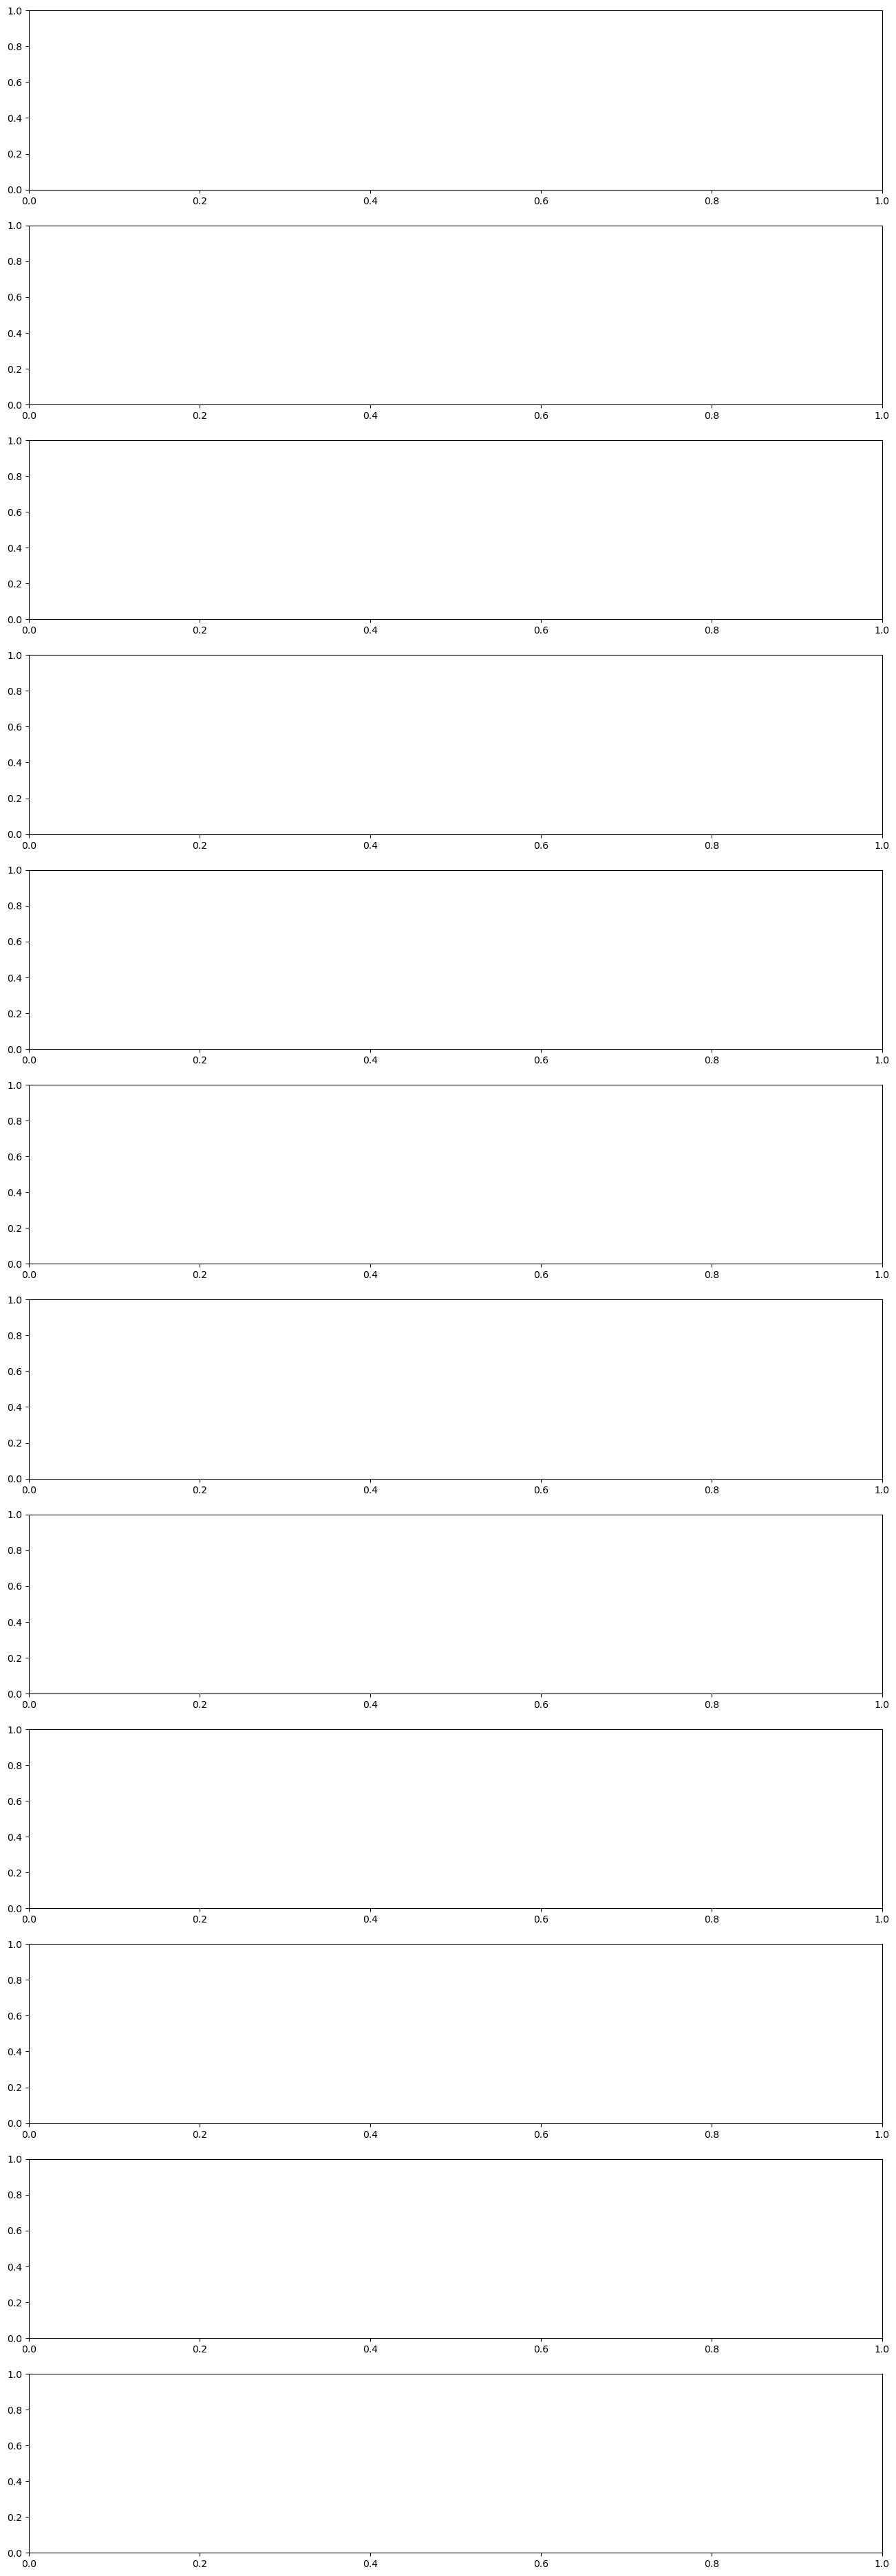

In [15]:

# Create the figure and axes objects
_, axes = plt.subplots(num_apvs, 1, figsize=(16, 4*num_apvs))  # You can specify your figure size here

for i,ax in enumerate(axes.flat):
    ax.bar(ch_bar_centers, flattened[5][i], width=1)
    # Create the bar plot on the axes object
    #ax.bar(x_values, flattened[4][2], width=1)
    
    # Set axis titles
    #ax.set_xlabel('Channels')
    #ax.set_ylabel('Pedestals')

#plt.bar(np.arange(128) - 0.5, pedestals[0])#, where='post')

In [ ]:
# channel_data is of shape (1000, 7, 128, 6), the ch_mapping is (128) w
# We will sort along the third axis using the indices from ch_mapping
# raw_samples = np.take_along_axis(channel_data, ch_mapping[np.newaxis, np.newaxis, :, np.newaxis], axis=2)
# 
# # Verify the shape of the sorted array
# raw_samples.shape

In [ ]:
full_apv = (np.transpose(raw_samples, (0, 1, 3, 2))
            .reshape(len(raw_samples), num_apvs, num_channels * num_time_bins))
full_apv.shape

In [ ]:
x_values = np.arange(num_channels*num_time_bins) - 0.5

# Create the figure and axes objects
fig, axes = plt.subplots(num_apvs, 1, figsize=(16, 4*num_apvs))  # You can specify your figure size here
for i,ax in enumerate(axes.flat):
    ax.bar(x_values, full_apv[500][i], width=1)

In [ ]:
# Creating a 3D array for demonstration
array = np.array([[[1, 2, 3], [4,5,6]], [[7,8, 9], [10,11,12]]])

# Transpose the array over the second and third axes
transposed_array = np.transpose(array, (0, 2, 1))

# Reshape each 2x2 sub-array into a 1D array
result_array = transposed_array.reshape(transposed_array.shape[0], -1)

result_array